<a href="https://colab.research.google.com/github/minj0207/class_ai4dl/blob/main/mid%20term/AI4DL_mid_term.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mid-term exam on AI for Deep Learning

- Name:  장민정
- ID Number:  20216173

------------------------------------------
Firstly, copy this notebook to your google drive.  
Secondly, click 'Runtime' tab, 'Change runtime type' tab, and change 'Hardware accelerator' as 'GPU.'  
Now you are ready to go, good luck! :) 


In [1]:
import tensorflow as tf
tf.keras.__version__

'2.12.0'

## Generating data for the exam


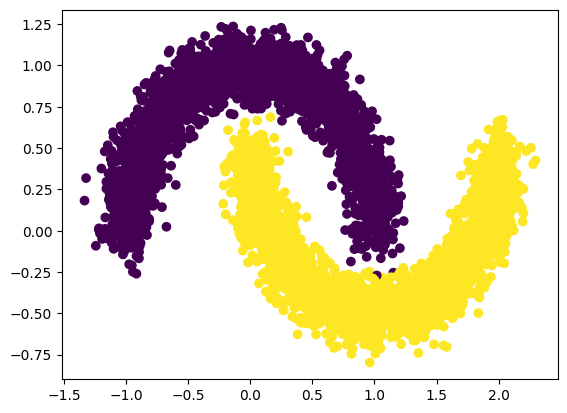

In [2]:
from sklearn.datasets import make_moons

inputs, targets = make_moons(n_samples=5000, noise=0.1)
inputs_dev, targets_dev = make_moons(n_samples=1000, noise=0.1)

import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets)
plt.show()

## Q1 We will use the generated data 

Inputs and targets are training data, and inputs_dev and targets_dev are validation data.

#### (Q1-1) [15 points] Check your data and design your neural network model
  - [5] Check dimension of inputs and targets. 
  - [5] Design a simple model using one hidden dense layer. 
    - Your hidden dense layer have dimension 3 with relu activation
    - Set the proper activation for binary outcome (0 or 1)  
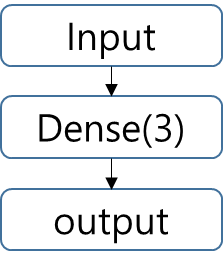
  - [5] Build your model and check model summary. The result should look like:

  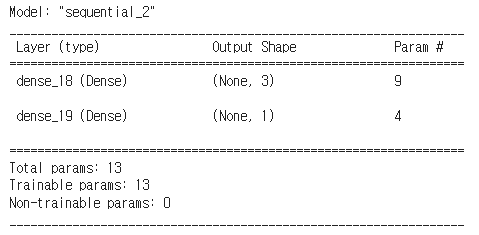



In [3]:
## change the code below to check dimension

inputs

array([[ 0.38198672,  1.07073767],
       [ 1.35476686, -0.5752903 ],
       [ 1.12242342, -0.52962057],
       ...,
       [ 0.83239141,  0.49345743],
       [-0.56662625,  0.79857466],
       [ 1.97308823,  0.33678304]])

In [4]:
## change the code below to check dimension

targets

array([0, 1, 1, ..., 0, 0, 1])

In [5]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(3, activation="relu")
])


In [33]:
## Build your model, and check the summary. your code here
model.compile()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                140       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 250
Trainable params: 250
Non-trainable params: 0
_________________________________________________________________


#### (Q1-2) [12 points] Compile your model.  
 - [4] Setup optimizer as 'SGD'
 - [4] Use binary cross entropy loss.
 - [4] Set your evaluation metric as 'accuracy'



In [7]:
### Define optimizer, loss, and metrics here

model.compile(optimizer="sgd",
              loss="bunary_crossentropy",
              metrics=["accuracy"])

#### (Q1-3) [8 points] Train your model and check results.  
 - [4]  Fit your model using 100 number of epochs with batch size 100. Specify validation data using _inputs_dev_ and _targets_dev_ datasets. 
 - [4] Evaluate your model using _inputs_dev_ and _targets_dev_.

In [12]:
    ### Your code here
inputs_dev=
targents_dev=


history = model.fit(inputs_dev, targets_dev, validation_data=(val_x, val_targets), epochs=100, batch_size=100)
              

NameError: ignored

In [ ]:
## Evaluate your model. Your code here:


32/32 [==============================] - 0s 2ms/step - loss: 0.2593 - accuracy: 0.8870


[0.259334534406662, 0.8870000243186951]

#### (Q1-4) [10 points] The current accuracy is not so good. Let's try having nine hidden dense layers to improve the model. 
  - Train and evaluate the model as done before. 
  - Try to visualzie the results.(sample visualization codes provided below)
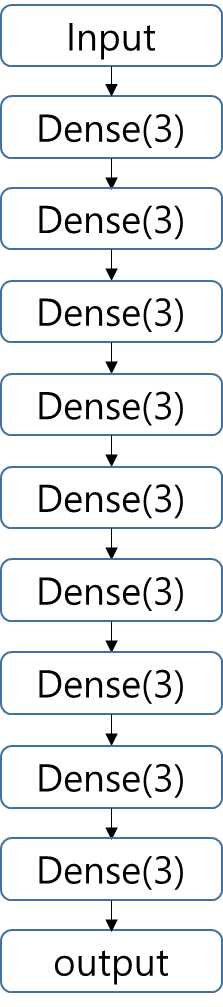



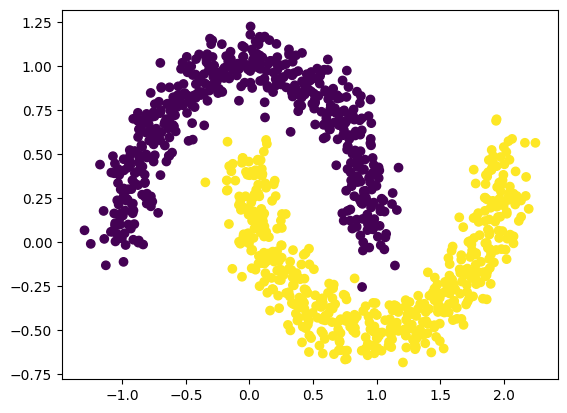

In [8]:
## Plot of the ground truth set
import matplotlib.pyplot as plt
plt.scatter(inputs_dev[:, 0], inputs_dev[:, 1], c=targets_dev)
plt.show()

32/32 [==============================] - 0s 1ms/step


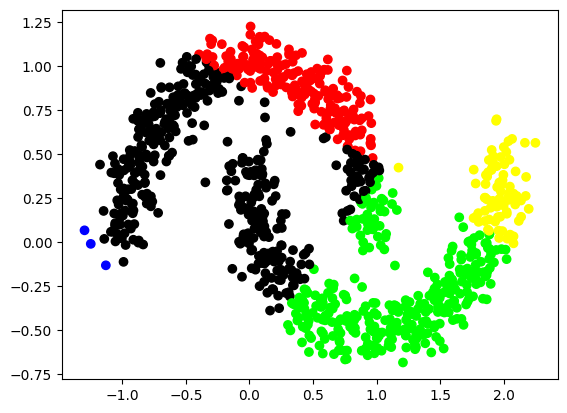

In [9]:
## Plot of your model
## replace the result with your upgraded model
import matplotlib.pyplot as plt
res1 = model.predict(inputs_dev)
decision1 = res1 > .5
plt.scatter(inputs_dev[:, 0], inputs_dev[:, 1], c=decision1)
plt.show()


In [40]:
model = models.Sequential([layers.Dense(3, activation="relu"),
    layers.Dense(3, activation="sigmoid"),
    layers.Dense(3, activation="softmax")
    layers.Dense(3, activation="relu"),
    layers.Dense(3, activation="sigmoid"),
    layers.Dense(3, activation="softmax")
    layers.Dense(3, activation="relu"),
    layers.Dense(3, activation="sigmoid"),
    layers.Dense(3, activation="softmax")
])


SyntaxError: ignored

In [41]:
### Define optimizer, loss, and metrics here
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [42]:
history = model.fit(trn_x, trn_targets, validation_data=(val_x, val_targets), epochs=100, batch_size=100)

Epoch 1/100


InvalidArgumentError: ignored

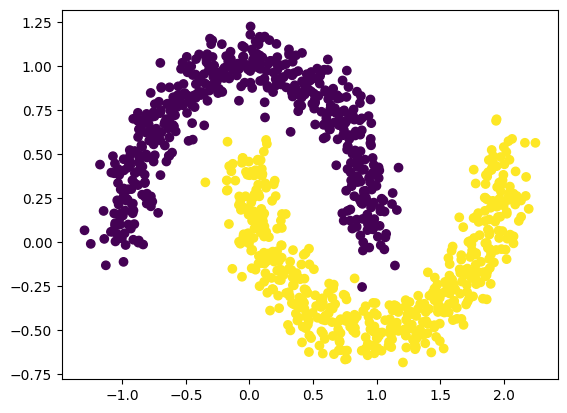

In [43]:
## Plot of the ground truth set
import matplotlib.pyplot as plt
plt.scatter(inputs_dev[:, 0], inputs_dev[:, 1], c=targets_dev)
plt.show()

In [44]:
## Plot of your new model
import matplotlib.pyplot as plt
res1 = model.predict(inputs_dev)
decision1 = res1 > .5
plt.scatter(inputs_dev[:, 0], inputs_dev[:, 1], c=decision1)
plt.show()

ValueError: ignored

## Q2 We will use the Boston housing data for Q2

In [13]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [14]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [15]:
train_data.shape

(404, 13)

In [17]:
import numpy as np 

indices_permutation = np.random.permutation(404)
shuffled_x_train = train_data[indices_permutation]
shuffled_train_targets = train_targets[indices_permutation]

num_validation_samples = 54

## Complete the code below: 
val_x = shuffled_x_train[:54] ## take first 54 samples of shuffled_x_train 
val_targets = shuffled_train_targets[:54] ## take first 54 samples of shuffled_train_targets 


trn_x = shuffled_x_train[54:]
trn_targets = shuffled_train_targets[54:]


#### (Q2-1) [16 points] Design your neural network model with the structure below

- We have two hidden Dense layers and one output layer as described below.
  - [4] Try to make your model using functional API
  - [4] Setup output sizes as 10 and 10 for hidden dense layers with relu activation.
  - [4] Setup appropriate output dense layer for this regression problem. 
  - [4] For compile your model, let's use the RMSprop optimizer and specify the MSE as the loss function. For evaluation metrics, let's use MAE and MSE.

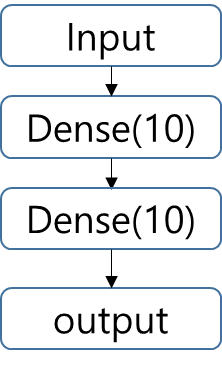

In [18]:
trn_x.shape

(350, 13)

In [21]:
from tensorflow import keras
from tensorflow.keras import layers
  
# define your model here using Functional API 
model =  keras.Sequential([
    layers.Dense(10, activation="relu"),
    layers.Dense(10, activation="relu")
])
    

  # compile your model
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])


#### (Q2-2) [16 points] Fit your model. 
- [4] Use epoch size of 100, and batch size of 50.
- [4] Use trn_x and trn_targets as training data
- [4] Use val_x and val_targets as validation data 
- [4] Use ModelCheckpoint callback. Save the best one with respect to validation MAE.

In [30]:
## Define your callback here

## fit your model
history = model.fit(trn_x, trn_targets, validation_data=(val_x, val_targets), epochs=100, batch_size=50)
    

Epoch 1/100
7/7 [==============================] - 0s 26ms/step - loss: 96.4451 - mae: 7.4876 - val_loss: 63.6489 - val_mae: 6.7177
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 94.0336 - mae: 7.3812 - val_loss: 62.0433 - val_mae: 6.6418
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 91.7287 - mae: 7.2846 - val_loss: 60.4638 - val_mae: 6.5652
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 89.4647 - mae: 7.1901 - val_loss: 58.8939 - val_mae: 6.4867
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 87.1960 - mae: 7.0909 - val_loss: 57.3491 - val_mae: 6.4076
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 85.0148 - mae: 6.9906 - val_loss: 55.9134 - val_mae: 6.3327
Epoch 7/100
7/7 [==============================] - 0s 10ms/step - loss: 82.9201 - mae: 6.8986 - val_loss: 54.5204 - val_mae: 6.2583
Epoch 8/100
7/7 [==============================] - 0s 8ms/step - loss: 80.927

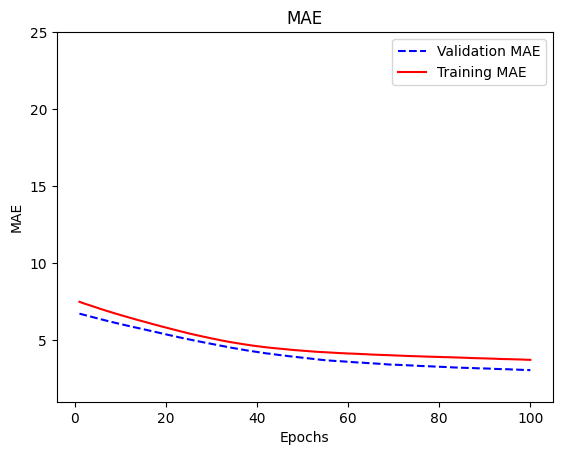

In [31]:
## Visualizing training result
import matplotlib.pyplot as plt
val_loss = history.history["val_mae"]
trn_loss = history.history["mae"]
epochs = range(1, 101)
plt.plot(epochs, val_loss, "b--",
         label="Validation MAE")
plt.plot(epochs, trn_loss, "r-",
         label="Training MAE")
plt.title("MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.ylim([1,25])
plt.legend()

#### (Q2-3) [8 points] Load the best model from your callback checkpoint. Evaluate your model on test data. 
- [4] Load the best model from your ModelCheckpoint callback
- [4] Report the MAE and MSE score on test data 

In [36]:
## Load the best model, and use model.evaluate to get MAE and MSE scores.
# Evaluate the model on the test data
test_loss, test_mae, test_mse = model.evaluate(test_data, test_targets)

# Print the MAE and MSE scores on the test data
print(f'Test MAE: {test_mae:.2f}')
print(f'Test MSE: {test_mse:.2f}')

4/4 [==============================] - 0s 3ms/step - loss: 0.0000e+00


TypeError: ignored

#### (Q2-4) [15 points] Assuming that you have the Boston housing prices from 5 years ago, we have generated a fake dataset as below.

In [32]:
## house price 5 years ago
trn_price_5years_ago = trn_targets - 5 + np.random.random(len(trn_targets))*5 
val_price_5years_ago = val_targets - 5 + np.random.random(len(val_targets))*5 

We would like to create a multi-input model with 'Boston housing prices from 5 years ago' as input2. Try to make your model as below.

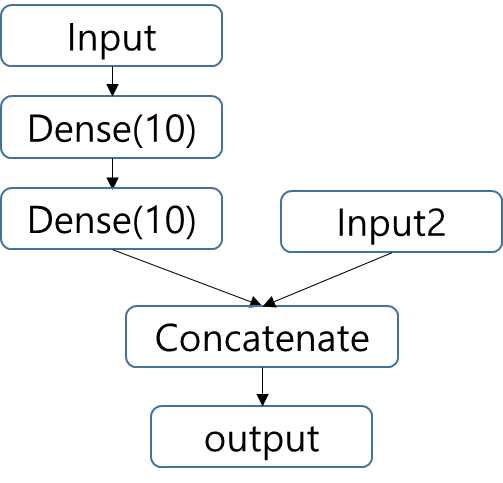


In [38]:
from tensorflow import keras
from tensorflow.keras import layers

## Your model here
model =  keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(100, activation="sigmoid"),
    layers.Dense(10, activation="softmax")
])

## Compile your model
model.compile()


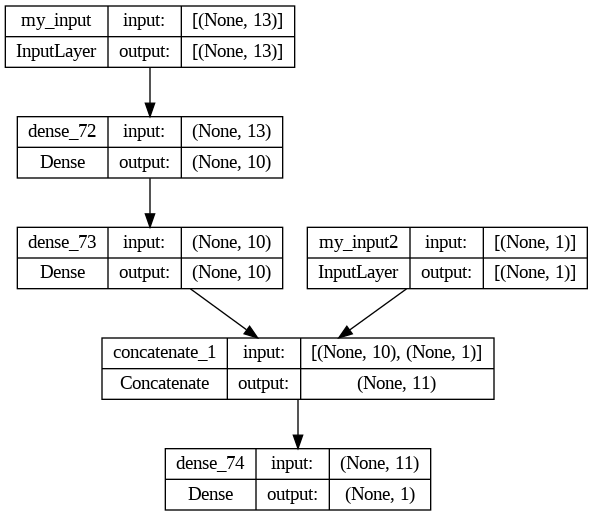

In [ ]:
## Your model may look like this.
keras.utils.plot_model(model, "model2.png", show_shapes=True)

In [ ]:
## Fit your model 
    ## Specify training data, validation data

history = model.fit(##Specify training data ,
                    trn_targets,
                    epochs=100,
                    batch_size=50,
                    ##Specify validation data
    )

Epoch 1/100
7/7 [==============================] - 2s 33ms/step - loss: 177.7349 - mae: 12.7545 - mse: 177.7349 - val_loss: 156.3289 - val_mae: 12.1144 - val_mse: 156.3289
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 165.3035 - mae: 12.2794 - mse: 165.3035 - val_loss: 147.6044 - val_mae: 11.7532 - val_mse: 147.6044
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 156.5194 - mae: 11.9322 - mse: 156.5194 - val_loss: 140.2543 - val_mae: 11.4396 - val_mse: 140.2543
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 148.8031 - mae: 11.6189 - mse: 148.8031 - val_loss: 133.5437 - val_mae: 11.1459 - val_mse: 133.5437
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 141.7293 - mae: 11.3210 - mse: 141.7293 - val_loss: 127.2806 - val_mae: 10.8642 - val_mse: 127.2806
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 135.0156 - mae: 11.0323 - mse: 135.0156 - val_loss: 121.2942 - val_mae: 1

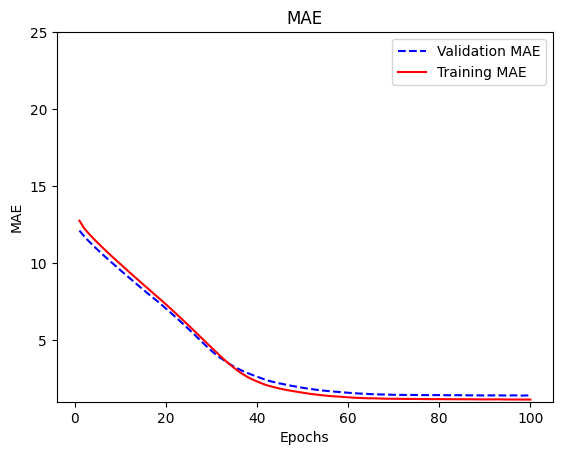

In [ ]:
import matplotlib.pyplot as plt
val_loss = history.history["val_mae"]
trn_loss = history.history["mae"]
epochs = range(1, 101)
plt.plot(epochs, val_loss, "b--",
         label="Validation MAE")
plt.plot(epochs, trn_loss, "r-",
         label="Training MAE")
plt.title("MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.ylim([1,25])
plt.legend()